In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import tensorflow as tf
import requests
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import roc_auc_score,f1_score,confusion_matrix
from tensorflow.keras.layers import Dense,Input
from tensorflow.keras.models import Model
from tensorflow.keras.losses import BinaryCrossentropy
from tensorflow.keras.optimizers import Adam


In [3]:
url = 'https://lazyprogrammer.me/course_files/AirlineTweets.csv'
r = requests.get(url, allow_redirects=True)

from io import StringIO
data = StringIO(r.text)
df=pd.read_csv(data,encoding='ISO-8859-1')

In [4]:
np.random.seed(0)

In [5]:
df=df[['airline_sentiment','text']]

<Axes: >

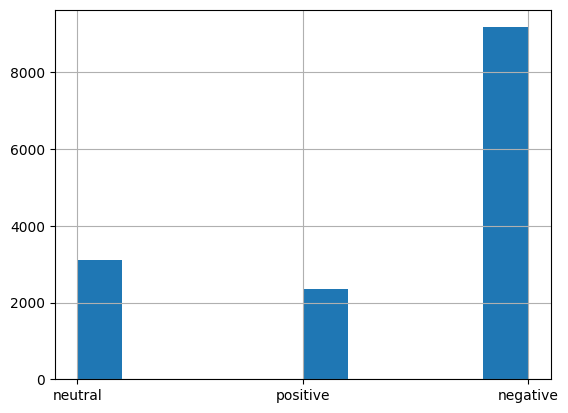

In [6]:
df['airline_sentiment'].hist()

In [7]:
df=df[df['airline_sentiment']!='neutral'].copy()

In [8]:
target_map={'positive':1,'negative':0}
df['target']=df['airline_sentiment'].map(target_map)

In [9]:
df.head()

,airline_sentiment,text,target
1,positive,@VirginAmerica plus you've added commercials t...,1
3,negative,@VirginAmerica it's really aggressive to blast...,0
4,negative,@VirginAmerica and it's a really big bad thing...,0
5,negative,@VirginAmerica seriously would pay $30 a fligh...,0
6,positive,"@VirginAmerica yes, nearly every time I fly VX...",1


In [10]:
df_train,df_test=train_test_split(df,random_state=42)

In [11]:
vectorizer =TfidfVectorizer(max_features=2000)
X_train=vectorizer.fit_transform(df_train['text'])
X_test=vectorizer.transform(df_train['text'])

In [12]:
X_train=X_train.toarray()
X_test=X_test.toarray()

In [13]:
Y_train=df_train['target']
Y_test=df_test['target']

In [14]:
D=X_train.shape[1]


In [15]:
i=Input(shape=(D,))
x=Dense(1)(i)
model=Model(i,x)

In [16]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 2000)]            0         
                                                                 
 dense (Dense)               (None, 1)                 2001      
                                                                 
Total params: 2,001
Trainable params: 2,001
Non-trainable params: 0
_________________________________________________________________


In [17]:
model.compile(loss=BinaryCrossentropy(from_logits=True),optimizer=Adam(learning_rate=0.01),metrics=['accuracy'])

In [20]:
r=model.fit(X_train,Y_train,epochs=40)

Epoch 1/40
271/271 [==============================] - 1s 3ms/step - loss: 0.2453 - accuracy: 0.8737
Epoch 2/40
271/271 [==============================] - 1s 2ms/step - loss: 0.2065 - accuracy: 0.9034
Epoch 3/40
271/271 [==============================] - 0s 2ms/step - loss: 0.1825 - accuracy: 0.9172
Epoch 4/40
271/271 [==============================] - 0s 2ms/step - loss: 0.1661 - accuracy: 0.9266
Epoch 5/40
271/271 [==============================] - 0s 2ms/step - loss: 0.1535 - accuracy: 0.9331
Epoch 6/40
271/271 [==============================] - 0s 2ms/step - loss: 0.1437 - accuracy: 0.9383
Epoch 7/40
271/271 [==============================] - 0s 2ms/step - loss: 0.1355 - accuracy: 0.9437
Epoch 8/40
271/271 [==============================] - 0s 2ms/step - loss: 0.1287 - accuracy: 0.9456
Epoch 9/40
271/271 [==============================] - 0s 2ms/step - loss: 0.1228 - accuracy: 0.9486
Epoch 10/40
271/271 [==============================] - 0s 2ms/step - loss: 0.1178 - accuracy: 0.9525

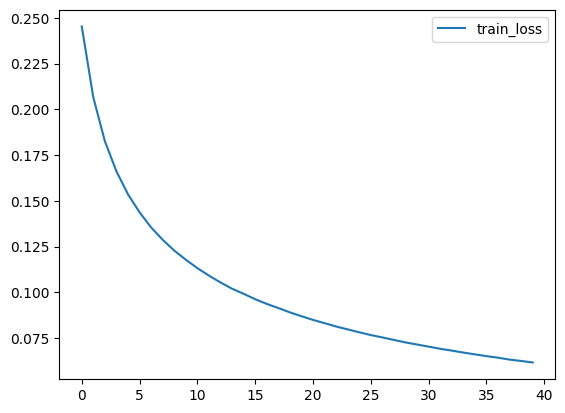

In [21]:
plt.plot(r.history['loss'],label='train_loss')
plt.legend()

In [22]:
w=model.layers[1].get_weights()[0]

In [ ]:
word_index_map=vectorizer.vocabulary_
word_index_map

In [24]:
threshold=2
print('most positive words:')
word_weight_tuples=[]
for word,index in word_index_map.items():
    weight=w[index,0]
    if weight>threshold:
        word_weight_tuples.append((word,weight))
word_weight_tuples=sorted(word_weight_tuples,key=lambda x:-x[1])
for i in range(10):
    word,weight=word_weight_tuples[i]
    print(word,weight)

most positive words:
thank 16.847338
worries 16.294302
thanks 14.980325
excellent 13.568891
kudos 12.605176
love 12.06318
great 11.823298
awesome 11.245329
hot 9.929128
excited 9.837633
